In [1]:
import sympy as sym
from IPython.display import display
print sym.__version__

1.1.1


In [2]:
sym.init_printing()
x, t = sym.symbols('x t', real=True)

In [3]:
def area(dist):
    return sym.simplify(sym.integrate(dist, (x, -sym.oo, sym.oo)))

def mean(dist):
    return area(dist*x)

def EX2(dist):
    return area(dist*x**2)

def variance(dist):
    return sym.simplify(EX2(dist) - mean(dist)**2)

def mgf(dist):
    return sym.simplify(area(dist*sym.exp(x*t)))

In [4]:
def summarize(dist):
    print "Distribution:"
    display(dist)
    print "Area:"
    display(area(dist))
    print "Mean:"
    display(mean(dist))
    print "Variance:"
    display(variance(dist))
    print "MGF:"
    display(mgf(dist))

summarise = summarize  # alias

In [5]:
# Define other symbols that show up
mu = sym.symbols('mu', real=True)
sigma, a, b, lamb, nu = sym.symbols('sigma a b lambda nu', positive=True)

### Normal distribution: $\mathcal{N}(x; \mu, \sigma^2)$

In [6]:
normal = (2*sym.pi*sigma**2) ** sym.Rational(-1, 2) * sym.exp(-(x-mu)**2/(2*sigma**2))

In [7]:
sym.latex(mean(normal))

'\\mu'

Distribution:


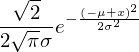

Area:


Mean:


Variance:


MGF:


In [8]:
summarize(normal)

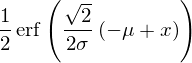

In [9]:
sym.integrate(normal, x)

### Laplace distribution: $DoubleExp(x; \mu, b)$

In [10]:
laplace = (2*b) ** (-1) * sym.exp(-sym.Abs(x-mu)/b)

Distribution:


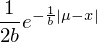

Area:


Mean:


Variance:


MGF:


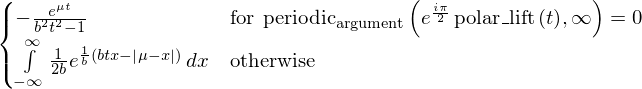

In [11]:
summarize(laplace)

In [12]:
# sym.refine(mgf(laplace), sym.Q.positive(1/b - sym.Abs(t)))  # had to abort

### Exponential distribution: $Exp(x; \lambda)$

In [13]:
expo = sym.Piecewise(
    (0, x < 0),
    (lamb * sym.exp(-lamb*x), True)
)

Distribution:


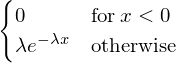

Area:


Mean:


Variance:


MGF:


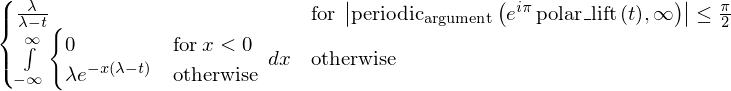

In [14]:
summarize(expo)

### Gamma distribution: $Gamma(x; a, b)$

In [15]:
gamma = sym.Piecewise(
    (0, x < 0),
    (b**a / sym.gamma(a) * x**(a-1) * sym.exp(-x*b), True)
)

Distribution:


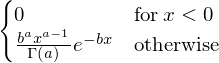

Area:


Mean:


Variance:


MGF:


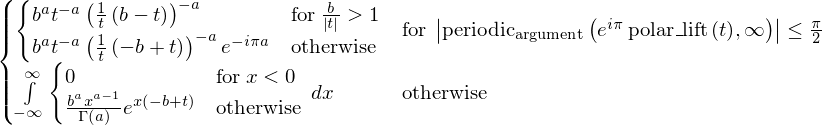

In [16]:
summarize(gamma)

### Beta distribution: $Beta(x; a, b)$

In [17]:
beta = sym.Piecewise(
    (0, x < 0),
    (0, x > 1),
    (x**(a-1)*(1-x)**(b-1)/(sym.gamma(a)*sym.gamma(b)/sym.gamma(a+b)), True)
)

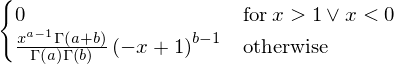

In [18]:
beta

In [19]:
# mean(beta)  # had to abort

In [33]:
beta = sym.Piecewise(
    (0, x < 0),
    (0, x > 1),
    (x**(a-1)*(1-x)**(b-1)/(sym.beta(a, b)), True)
)

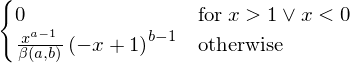

In [34]:
beta

### Uniform distribution

In [20]:
uniform = sym.Piecewise(
    (0, x < 0),
    (0, x > 1),
    (1, True)
)

Distribution:


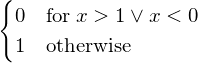

Area:


Mean:


Variance:


MGF:


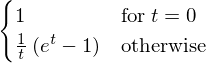

In [21]:
summarize(uniform)

### Student t distribution

In [22]:
student = (1 + ((x-mu) / sigma)**2 / nu)**(-(1+nu)/2) * sym.gamma((nu+1)/2)/(sym.gamma(nu/2)*sym.sqrt(nu*sym.pi)*sigma)

Student's t doesn't have an MGF, so we just compute the ones we want

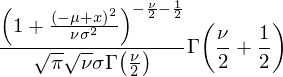

In [23]:
student

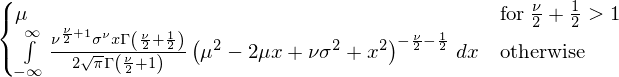

In [24]:
mean(student)

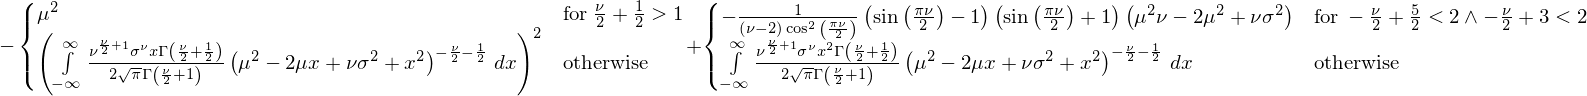

In [25]:
variance(student)

Note that not all the simplifications have been made, the mean should be $\mu$ and variance should be $\nu \sigma^2 / (\nu - 2)$

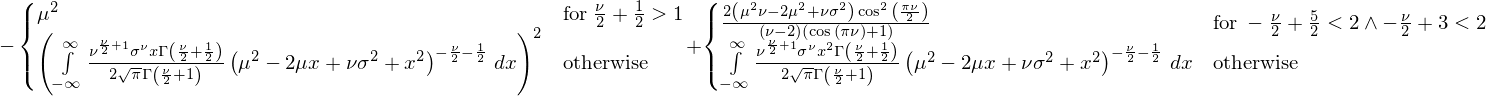

In [26]:
sym.trigsimp(variance(student))

Why doesn't it cancel?!?!

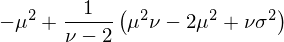

In [27]:
-mu**2 + (mu**2*nu-2*mu**2+nu*sigma**2)/(nu-2)

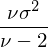

In [28]:
sym.simplify(-mu**2 + (mu**2*nu-2*mu**2+nu*sigma**2)/(nu-2))

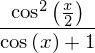

In [29]:
sym.simplify(sym.cos(x/2)**2/(sym.cos(x)+1))

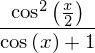

In [30]:
sym.trigsimp(sym.cos(x/2)**2/(sym.cos(x)+1))

Test our aliased, UK-friendly function

Distribution:


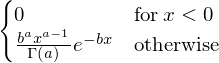

Area:


Mean:


Variance:


MGF:


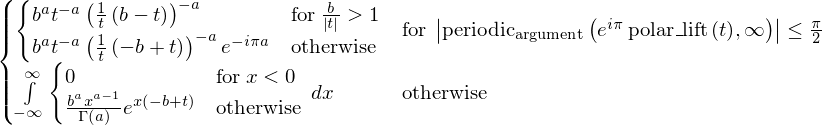

In [31]:
summarise(gamma)